In [1]:
pip install tensorflow matplotlib numpy opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke dataset
train_dir = r'C:\Users\Nicholas Sitorus\Coba\prediksi-raut-wajah\archive\images\train'
val_dir = r'C:\Users\Nicholas Sitorus\Coba\prediksi-raut-wajah\archive\images\validation'

# Augmentasi data untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data generator untuk validasi
val_datagen = ImageDataGenerator(rescale=1./255)

# Membaca gambar dari folder (grayscale)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Ukuran asli gambar
    batch_size=32,
    color_mode='grayscale',  # Grayscale mode
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),  # Ukuran asli gambar
    batch_size=32,
    color_mode='grayscale',  # Grayscale mode
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7064 images belonging to 7 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

model = Sequential([
    Input(shape=(48, 48, 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,423 (2.61 MB)

 Trainable params: 683,975 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Kompilasi model
model.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss untuk klasifikasi multi-kelas
    metrics=['accuracy']  # Metrik evaluasi
)

# Callback untuk menyimpan model terbaik dan menghindari overfitting
callbacks = [
    ModelCheckpoint(
        filepath='best_model.keras',  # Nama file untuk menyimpan model terbaik
        save_best_only=True,  # Simpan hanya model dengan performa terbaik
        monitor='val_loss',  # Pantau validasi loss
        mode='min'  # Simpan model dengan val_loss terkecil
    ),
    EarlyStopping(
        monitor='val_loss',  # Pantau validasi loss
        patience=5,  # Hentikan pelatihan jika tidak ada perbaikan setelah 5 epoch
        restore_best_weights=True  # Kembalikan bobot terbaik ke model
    )
]



In [11]:
# Pelatihan model
history = model.fit(
    train_generator,  # Data training
    epochs=50,  # Jumlah epoch
    validation_data=val_generator,  # Data validasi
    callbacks=callbacks  # Callback untuk monitoring
)


C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.2237 - loss: 2.0628

C:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 132s 138ms/step - accuracy: 0.2237 - loss: 2.0626 - val_accuracy: 0.2496 - val_loss: 1.8122
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 96s 106ms/step - accuracy: 0.2474 - loss: 1.8235 - val_accuracy: 0.2588 - val_loss: 1.8040
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 96s 106ms/step - accuracy: 0.2488 - loss: 1.8102 - val_accuracy: 0.2814 - val_loss: 1.7817
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.2544 - loss: 1.8001 - val_accuracy: 0.2964 - val_loss: 1.7469
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.2571 - loss: 1.7957 - val_accuracy: 0.2743 - val_loss: 1.7683
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.2603 - loss: 1.7898 - val_accuracy: 0.2567 - val_loss: 1.7899
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 98s 108ms/step - accuracy: 0.2573 - loss: 1.7873 - val_accuracy: 0.3131 - val_loss: 1.7151
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 97s 107ms/step - accuracy: 0.2645 - loss: 1.7772 - va

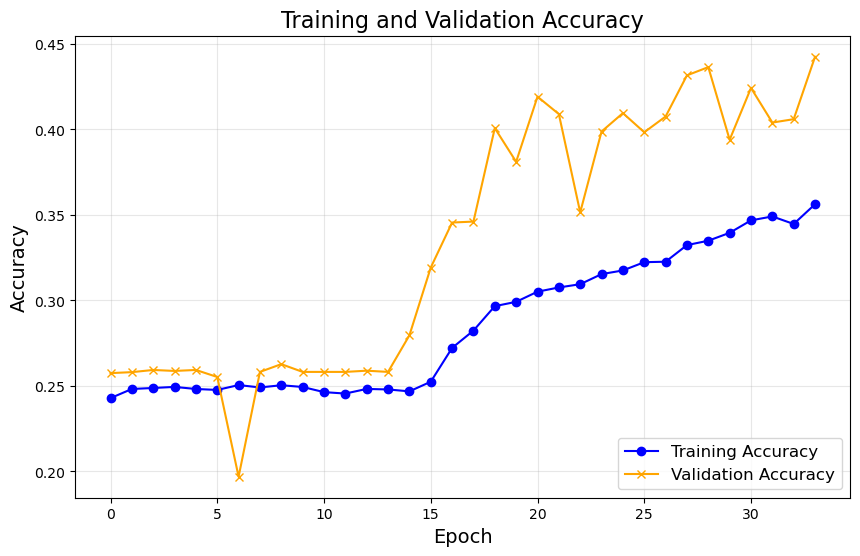

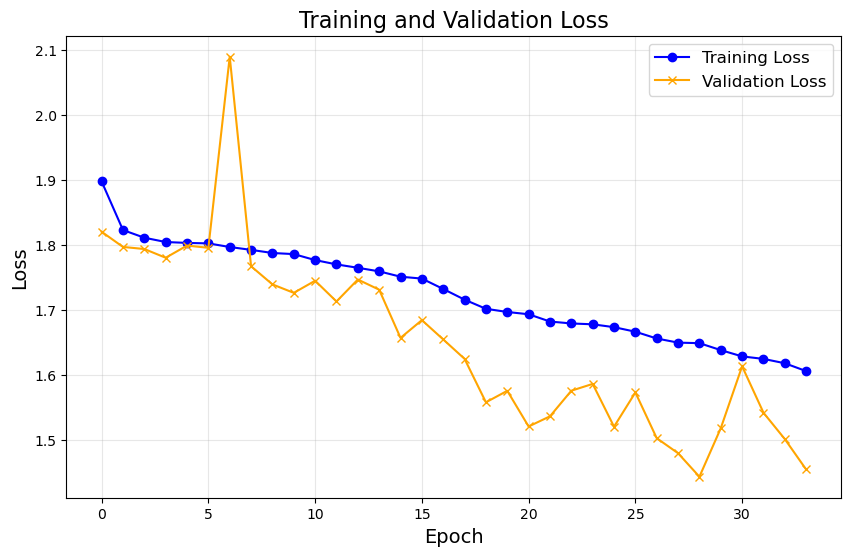

In [6]:
import matplotlib.pyplot as plt

# Grafik Akurasi
plt.figure(figsize=(10, 6))  # Ukuran grafik
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='x')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)  # Tambahkan grid untuk panduan visual
plt.show()

# Grafik Loss
plt.figure(figsize=(10, 6))  # Ukuran grafik
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='x')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.3)  # Tambahkan grid untuk panduan visual
plt.show()


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi data uji
y_pred_prob = model.predict(test_generator)  # Menghasilkan probabilitas kelas
y_pred = np.argmax(y_pred_prob, axis=1)      # Mengambil kelas dengan probabilitas tertinggi

# Mendapatkan label sebenarnya dari test_generator
y_true = validation_generator.classes  # Label sebenarnya dari test_generator
class_labels = list(validation_generator.class_indices.keys())  # Mendapatkan nama kelas

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'test_generator' is not defined

In [ ]:
model.save('facial_expression_model.keras')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('facial_expression_model.keras')


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_emotion(image_path, model, class_labels):
    # Load image with size 48x48 for prediction in grayscale mode
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Grayscale mode
    img_array = img_to_array(img) / 255.0  # Normalize pixel values to the range [0, 1]
    
    # Add batch dimension (1, 48, 48, 1)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]
    
    # Convert confidence to percentage
    confidence_percentage = confidence * 100
    
    return class_labels[predicted_class], confidence_percentage


In [ ]:
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
from IPython.display import display
from ipywidgets import FileUpload

# Unggah file
upload = FileUpload(accept='image/*', multiple=False)
display(upload)



In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

if upload.value:
    uploaded_file = upload.value[0]  # Directly access the first element of the tuple
    with open('uploaded_image.jpg', 'wb') as f:
        f.write(uploaded_file['content'])

    # Prediksi gambar yang diunggah
    predicted_label, confidence = predict_emotion('uploaded_image.jpg', model, class_labels)

    # Tampilkan gambar dan hasil prediksi
    img = Image.open('uploaded_image.jpg')
    plt.imshow(img, cmap='gray')  # Display in grayscale
    plt.axis('off')  # Hide axes
    plt.title(f'Predicted Emotion: {predicted_label} ({confidence:.2f}%)')
    plt.show()
